# Decision Tree Classification

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [3]:
titan = sns.load_dataset("titanic")

In [4]:
x = titan[["pclass", "sex", "age", "sibsp", "parch", "fare"]]
y = titan["survived"]

In [ ]:
# this converts sex into dummy variables here we are converting sex into dummy variables i.e., male=1, and female=0

x = pd.get_dummies(x, columns=["sex"])  # label encoding
x.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,22.0,1,0,7.2500,False,True
1,1,38.0,1,0,71.2833,True,False
2,3,26.0,0,0,7.9250,True,False
3,1,35.0,1,0,53.1000,True,False
4,3,35.0,0,0,8.0500,False,True


In [31]:
x.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [32]:
x.age.fillna(value=x["age"].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6788\2255652415.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x.age.fillna(value=x["age"].mean(), inplace=True)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
# model selection
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = model.predict(x_test)

In [36]:
# checking accuracy

print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.8044692737430168


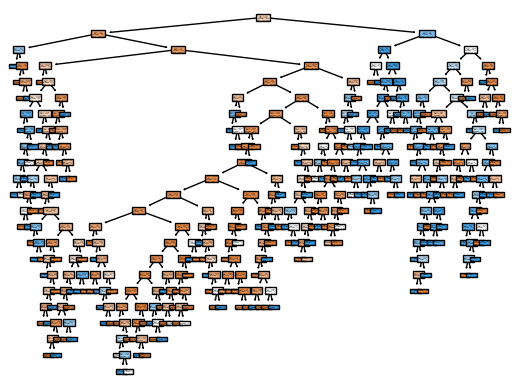

<Figure size 640x480 with 0 Axes>

In [37]:
# decision tree plotting

tree.plot_tree(model.fit(x, y), filled=True)
plt.show()
plt.savefig("tree.png")

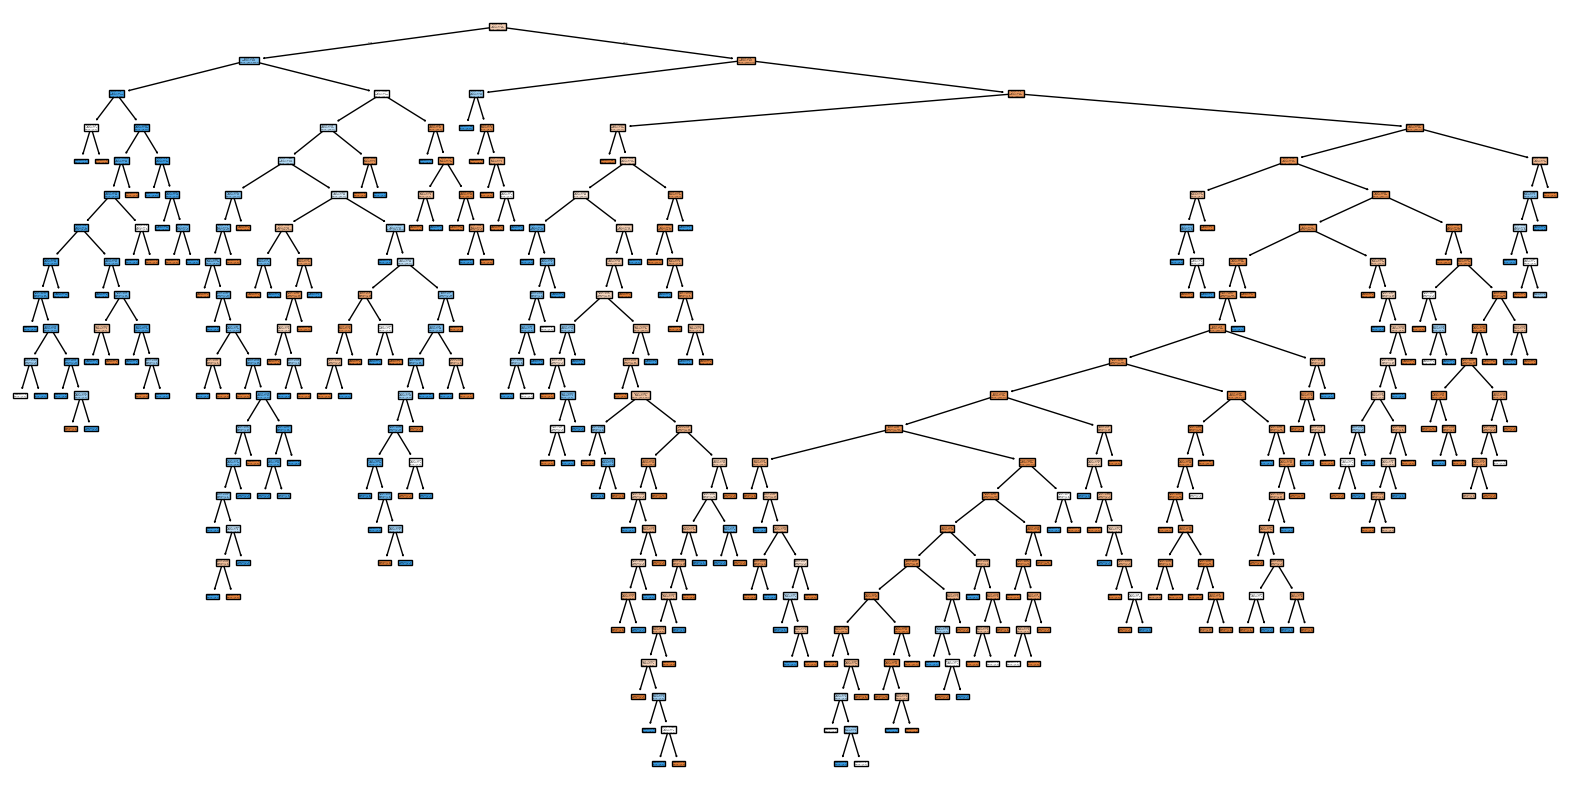

<Figure size 640x480 with 0 Axes>

In [49]:
# another way to create the decision tree using matplotlib
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model.fit(x, y), filled=True)
plt.show()
plt.savefig("decision_tree.pdf", format="pdf", dpi=600)

In [40]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    root_mean_squared_error,
)

MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
R2 = r2_score(y_true=y_test, y_pred=y_pred)
RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_pred)

print("MAE:", MAE)
print("MSE:", MSE)
print("R2:", R2)
print("RMSE:", RMSE)

MAE: 0.19553072625698323
MSE: 0.19553072625698323
R2: 0.1363385718224428
RMSE: 0.4421885641408914


In [41]:
# precision
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
print("Precision:", precision)


# precision score measures the proportion of ture positive predictions **among all positive predictions*
# recall score measures the proportion of correctly predicted instances out of all the instances that were **actually positive**
# f1 score is the harmonic mean of precision and recall score

Precision: 0.7014925373134329


In [42]:
recall_score(y_test, y_pred)
print("recall score:", recall_score(y_test, y_pred))

recall score: 0.7580645161290323


In [43]:
f1_score(y_test, y_pred)

0.7286821705426356

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred)
print(confusion_matrix)

col_0      0   1
survived        
0         97  20
1         15  47


<Axes: xlabel='col_0', ylabel='survived'>

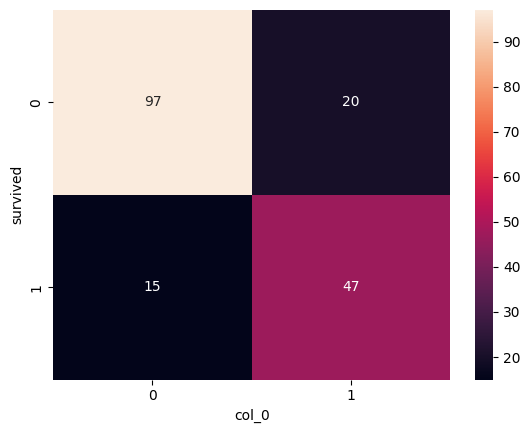

In [ ]:
sns.heatmap(confusion_matrix, annot=True, fmt="d")

Precision, recall, and F1 scores can be the same in certain cases, particularly when the number of true positives, false positives, and false negatives are balanced in a specific way. Here's why:

1. **Precision** is calculated as:
    \[
    \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
    \]

2. **Recall** is calculated as:
    \[
    \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
    \]

3. **F1 Score** is the harmonic mean of precision and recall:
    \[
    \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
    \]

If the precision and recall are equal, the F1 score will also be equal to them because the harmonic mean of two identical numbers is the number itself.

This situation can occur when:
- The classifier's predictions are perfectly balanced in terms of true positives, false positives, and false negatives.
- The dataset or the model's behavior results in a scenario where the proportion of true positives to false positives is the same as the proportion of true positives to false negatives.

To verify this, you can calculate the confusion matrix and check the values of TP, FP, and FN.

# K Nearest Neighbors (KNN) Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# prepare model

model1 = KNeighborsClassifier(
    n_neighbors=3
)  # The 3 means 3 nearest neighbors to use for classification
# (changing values to make the model accurate is called as hyperparameter tuning)

# fit model
model.fit(x_train, y_train)

# predict
y_pred1 = model.predict(x_test)

In [55]:
confusion_matrix = pd.crosstab(y_test, y_pred1)
print(confusion_matrix)

col_0      0   1
survived        
0         95  22
1         16  46


<Axes: xlabel='col_0', ylabel='survived'>

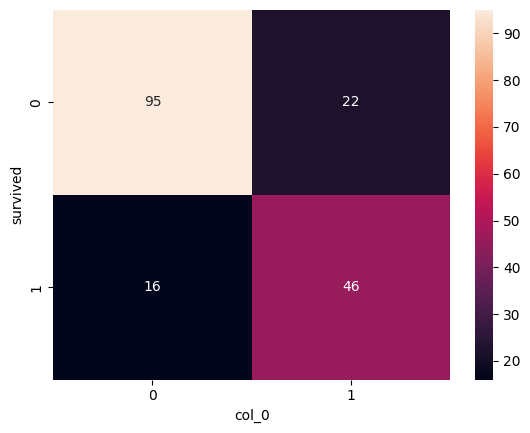

In [ ]:
sns.heatmap(confusion_matrix, annot=True)

# Random Forest Model

In [81]:
from sklearn.ensemble import RandomForestClassifier


# prepare model

model1 = RandomForestClassifier()

# fit model
model1.fit(x_train, y_train)

# predict
y_pred2 = model1.predict(x_test)

In [82]:
confusion_matrix = pd.crosstab(y_test, y_pred2)
print(confusion_matrix)

col_0      0   1
survived        
0         98  19
1         15  47


<Axes: xlabel='col_0', ylabel='survived'>

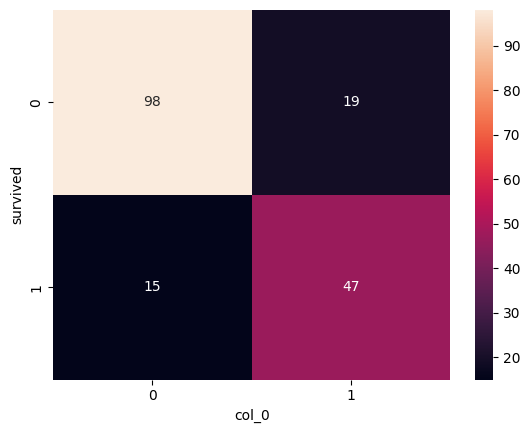

In [83]:
sns.heatmap(confusion_matrix, annot=True)

# Logistic Regression (Classifier Model)

Sigmoid function is used to convert the input value to a value between 0 and 1.

In [79]:
from sklearn.linear_model import LogisticRegression

# Update the Logistic Regression model with increased max_iter
model2 = LogisticRegression(max_iter=500)

# Fit the model again
model2.fit(x_train, y_train)

# Predict
y_pred3 = model2.predict(x_test)

In [80]:
confusion_matrix = pd.crosstab(y_test, y_pred3)
print(confusion_matrix)
print("precision_score :", precision_score(y_test, y_pred3))
print("recall_score :", recall_score(y_test, y_pred3))
print("f1_score :", f1_score(y_test, y_pred3))
print("accuracy_score :", accuracy_score(y_test, y_pred3))

col_0      0   1
survived        
0         99  18
1         16  46
precision_score : 0.71875
recall_score : 0.7419354838709677
f1_score : 0.7301587301587301
accuracy_score : 0.8100558659217877


# Support Vector Machine
hyper plain in SVM is a line or a plane in a n-dimensional space that is used to separate the data into different classes.

In [75]:
from sklearn.svm import SVC


# prepare model

model3 = SVC()

# fit model
model3.fit(x_train, y_train)

# predict
y_pred4 = model3.predict(x_test)

In [76]:
confusion_matrix = pd.crosstab(y_test, y_pred4)
print(confusion_matrix)
print("precision_score :", precision_score(y_test, y_pred4))
print("recall_score :", recall_score(y_test, y_pred4))
print("f1_score :", f1_score(y_test, y_pred4))
print("accuracy_score :", accuracy_score(y_test, y_pred4))

col_0       0   1
survived         
0         108   9
1          44  18
precision_score : 0.6666666666666666
recall_score : 0.2903225806451613
f1_score : 0.4044943820224719
accuracy_score : 0.7039106145251397


# NAIVE BAYES CLASSIFICATION
Naive Bayes is a classification algorithm that is based on Bayes' theorem. It is a probabilistic classification algorithm that is used to classify data into different categories. It is a simple and easy-to-understand algorithm that is used in many different fields, such as machine learning, data mining, and pattern recognition.

In [85]:
from sklearn.naive_bayes import GaussianNB

# prepare model

model4 = GaussianNB()

# fit model
model4.fit(x_train, y_train)

# predict
y_pred5 = model4.predict(x_test)

In [86]:
confusion_matrix = pd.crosstab(y_test, y_pred5)
print(confusion_matrix)
print("precision_score :", precision_score(y_test, y_pred5))
print("recall_score :", recall_score(y_test, y_pred5))
print("f1_score :", f1_score(y_test, y_pred5))
print("accuracy_score :", accuracy_score(y_test, y_pred5))

col_0      0   1
survived        
0         98  19
1         16  46
precision_score : 0.7076923076923077
recall_score : 0.7419354838709677
f1_score : 0.7244094488188977
accuracy_score : 0.8044692737430168


# Choosing the best model

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# 1. Define your models dictionary FIRST
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian NB": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# 3. Define your scoring metrics
scoring = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"]

# 4. Now perform cross-validation
results = []
for name, model in models.items():
    cv_results = cross_validate(
        model, x, y, cv=5, scoring=scoring, return_train_score=False
    )

    # Store results
    results.append(
        {
            "Model": name,
            "Accuracy": f"{cv_results['test_accuracy'].mean():.4f} (±{cv_results['test_accuracy'].std():.4f})",
            "Precision": f"{cv_results['test_precision_weighted'].mean():.4f}",
            "Recall": f"{cv_results['test_recall_weighted'].mean():.4f}",
            "F1-score": f"{cv_results['test_f1_weighted'].mean():.4f}",
        }
    )

# 5. Display results in a nice table
results_df = pd.DataFrame(results)
print("\nCross-Validation Results:")
print(results_df.to_string(index=False))


Cross-Validation Results:
              Model         Accuracy Precision Recall F1-score
      Decision Tree 0.7745 (±0.0250)    0.7752 0.7745   0.7743
        Gaussian NB 0.7902 (±0.0240)    0.7896 0.7902   0.7891
Logistic Regression 0.7834 (±0.0184)    0.7824 0.7834   0.7818
                SVM 0.6746 (±0.0423)    0.6756 0.6746   0.6340
                KNN 0.7127 (±0.0345)    0.7100 0.7127   0.7095
      Random Forest 0.8137 (±0.0343)    0.8134 0.8137   0.8127



Cross-Validation Results:
Decision Tree:
  Mean Accuracy: 0.7901
  Std Deviation: 0.0352
--------------------------------------------------
Gaussian NB:
  Mean Accuracy: 0.7957
  Std Deviation: 0.0221
--------------------------------------------------
Logistic Regression:
  Mean Accuracy: 0.7890
  Std Deviation: 0.0149
--------------------------------------------------
SVM:
  Mean Accuracy: 0.6779
  Std Deviation: 0.0141
--------------------------------------------------
KNN:
  Mean Accuracy: 0.7227
  Std Deviation: 0.0375
--------------------------------------------------
Random Forest:
  Mean Accuracy: 0.8215
  Std Deviation: 0.0175
--------------------------------------------------


C:\Users\user\AppData\Local\Temp\ipykernel_6788\883016125.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results[name]['All Scores'] for name in models.keys()],


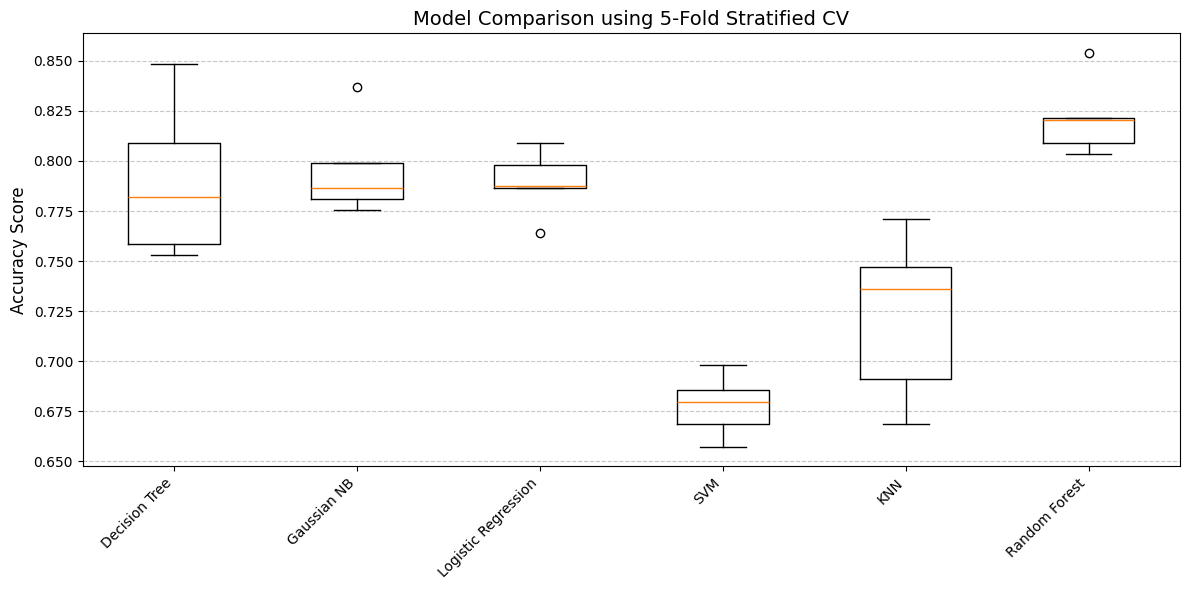

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# 2. Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian NB": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# 3. Perform cross-validation and store all scores
results = {}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=stratified_kfold, scoring="accuracy")
    results[name] = {
        "Mean Accuracy": cv_scores.mean(),
        "Std Deviation": cv_scores.std(),
        "All Scores": cv_scores,
    }

# 4. Print numerical results
print("\nCross-Validation Results:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Accuracy: {metrics['Mean Accuracy']:.4f}")
    print(f"  Std Deviation: {metrics['Std Deviation']:.4f}")
    print("-" * 50)

# 5. Visualization - Corrected boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(
    [results[name]["All Scores"] for name in models.keys()], labels=list(models.keys())
)
plt.title("Model Comparison using 5-Fold Stratified CV", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# define the model to be evaluated
models = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
]
names = [
    "Logistic Regression",
    "SVM",
    "KNN",
    "Naive Bayes",
    "Decision Tree",
    "Random Forest",
]

# performing k-fold cross validation
k = 10
for name, model in zip(names, models):
    cv_scores = cross_val_score(model, x_train, y_train, cv=k)
    print(f"{name} CV accuracy : {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}")

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Logistic Regression CV accuracy : 0.792 +/- 0.049
SVM CV accuracy : 0.671 +/- 0.031
KNN CV accuracy : 0.732 +/- 0.058
Naive Bayes CV accuracy : 0.792 +/- 0.059
Decision Tree CV accuracy : 0.789 +/- 0.049
Random Forest CV accuracy : 0.813 +/- 0.044


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameter = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(), parameter, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameter:", format(grid_search.best_params_))
print("Best cross validation score:", format(grid_search.best_score_))

Best parameter: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross validation score: 0.7850586033684624
